## <span style="color:blue"> TP2 : Classification using Linear & Quadratic Discriminant Analysis </span>

First think of configuring your notebook :

In [79]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import numpy as np

## <span style="color:blue"> Reading synthetic data </span>

Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [80]:
train = np.loadtxt('synth_train.txt')
test = np.loadtxt('synth_test.txt')

# classes of data points in the train and test sets 
c_train = train[:, 0]
c_test = test[:, 0]

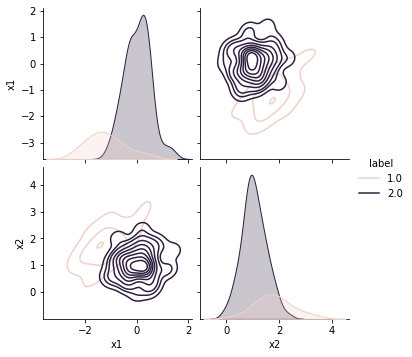

In [111]:
# visualizing data
import seaborn as sns 
import pandas as pd 

labels = ['label', 'x1', 'x2']
df_train = pd.DataFrame(train, columns = labels)
df_test = pd.DataFrame(test, columns = labels)

sns.pairplot(df_train, hue="label", kind = 'kde')

***Remark :*** As the graphical representation above suggests, we can approximately assume the ***normal distribution*** of features inside each class. 

## <span style="color:blue"> Recall about the main steps of discriminant analysis: </span>

* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


### * Preliminary steps

** <ins>Estimation of $\pi_1$ and $\pi_2$ </ins>**


In [84]:
class_1 = train[np.array(train[:, 0] == 1)]   # train data points from class 1
class_2 = train[np.array(train[:, 0] == 2)]   # train data points from class 2

N1 = class_1.shape[0]   # nb of points from C1
N2 = class_2.shape[0]   # nb of points from C2
N = train.shape[0]   

# estimation of pi1 and pi2
pi1, pi2 = N1/N, N2/N

**<ins> Estimation of $\mu_1$ and $\mu_2$ </ins>**

In [86]:
mu1 = np.mean(class_1[:, 1:], axis=0)
mu2 = np.mean(class_2[:, 1:], axis=0)

**<ins> Estimation of $\Sigma_1$ and $\Sigma_2$ </ins>**

In [87]:
sigma1 = np.cov(class_1[:, 1:].T, bias = True) 
sigma2 = np.cov(class_2[:, 1:].T, bias = True) 

**<ins> Estimation of the common averaged covariance $\Sigma$ </ins>**

In [113]:
sigma = pi1 * sigma1 + pi2 * sigma2

## <span style="color:blue"> TO DO : linear & quadratic discriminant analysis (LDA & QDA) </span>
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


**<span style="color:#c83349"> <ins>  Question 1 : Implementation of the LDA classifier </ins></span>**

We recall the expression of the estimated output class given input features using LDA classifier : 

\begin{equation}
C_{LDA}(x) = \arg \max_{k} \; (x - \frac{1}{2}\hat\mu_k)^T\hat\Sigma^{-1}(\hat\mu_k) + \log(\hat\pi_k)
\end{equation}

In [114]:
def lda_classifier(data):
    classes = np.zeros(shape = (data.shape[0], 2))
    classes[:, 0] = np.sum(((data - 0.5*mu1).dot(la.inv(sigma)))* mu1, axis = 1)+ np.log(pi1)  # ~ prob of being in C1
    classes[:, 1] = np.sum(((data - 0.5*mu2).dot(la.inv(sigma)))* mu2, axis = 1)+ np.log(pi2)  # ~ prob of being in C2

    return np.argmax(classes, axis = 1) + 1

**<span style="color:#c83349"> <ins>  Question 2 : Implementation of the QDA classifier </ins></span>**

The estimated class using QDA given a vector of input features $x$ is defined as follows:  

\begin{equation}
C_{QDA}(x) = \arg \max_{k}- \frac{1}{2}(x - \hat\mu_k)^T\hat\Sigma_k^{-1}(x - \hat\mu_k) - \frac{1}{2}\log|\hat\Sigma_k| + \log(\hat\pi_k)
\end{equation}

In [115]:
def qda_classifier(data):
    classes = np.zeros(shape = (data.shape[0], 2))
    classes[:, 0] = -0.5 * np.sum(((data - mu1).dot(la.inv(sigma1)))* (data - mu1), axis = 1)+ np.log(pi1) - 0.5 * np.log(abs(la.det(sigma1))) # ~ prob of being in C1
    classes[:, 1] = -0.5 * np.sum(((data - mu2).dot(la.inv(sigma2)))* (data - mu2), axis = 1)+ np.log(pi2) - 0.5 * np.log(abs(la.det(sigma2))) # ~ prob of being in C2

    return np.argmax(classes, axis = 1) + 1

**<span style="color:#c83349"> <ins>  Question 3 : Displaying decision boundaries and computing error rates (for train and test) </ins></span>**

*Train and test error rates using LDA and QDA*

In [149]:
# prediction of classes using LDA
c_train_lda = lda_classifier(train[:, 1:])
c_test_lda = lda_classifier(test[:, 1:])

# prediction of classes using QDA
c_train_qda = qda_classifier(train[:, 1:])
c_test_qda = qda_classifier(test[:, 1:])

In [158]:
# train and test error rates using LDA 
train_error_lda = np.count_nonzero(c_train_lda[c_train_lda != train[:, 0] ])/train.shape[0]
test_error_lda = np.count_nonzero(c_test_lda[c_test_lda != test[:, 0] ])/test.shape[0]

# train and test error rates using LDA 
train_error_qda = np.count_nonzero(c_train_qda[c_train_qda != train[:, 0] ])/train.shape[0]
test_error_qda = np.count_nonzero(c_test_qda[c_test_qda != test[:, 0] ])/test.shape[0]

print("Train error with lDA  : " + str(round(train_error_lda*100, 2)) +"%")
print("Test error with lDA  : " + str(round(test_error_lda*100, 2)) +"%")

print("\n----------------------------")
print("Train error with QDA  : " + str(round(train_error_qda*100, 2)) +"%")
print("Test error with QDA  : " + str(round(test_error_qda*100, 2)) +"%")

Train error with lDA  : 3.0%
Test error with lDA  : 5.5%

----------------------------
Train error with QDA  : 5.0%
Test error with QDA  : 5.0%


*LDA's decision boundary*

In [119]:
from matplotlib.colors import ListedColormap
import seaborn as sns

cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'c']

h = .04  # step size for the mesh

# plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x1_min, x1_max] x [x2_min, x2_max]
x_min, x_max = test[:, 1].min() - 1, test[:, 1].max() + 1
y_min, y_max = test[:, 2].min() - 1, test[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h ),
                     np.arange(y_min, y_max, h))

Text(0.5, 1.0, 'Separation boundary using the LDA classifier')

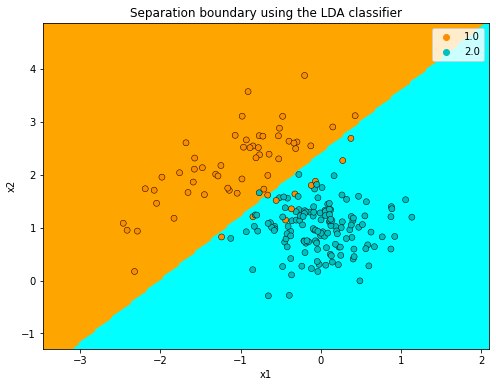

In [159]:
# class prediction for each point on the grid using LDA classifier
Z = lda_classifier(np.c_[xx.ravel(), yy.ravel()])

# plotting the LDA boundary 
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=cmap_light)

sns.scatterplot(x=test[:, 1], y=test[:, 2], hue=test[:, 0],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlabel("x1"), plt.ylabel("x2")
plt.title("Separation boundary using the LDA classifier")

*QDA's decision boundary*

Text(0.5, 1.0, 'Separation boundary using the QDA classifier')

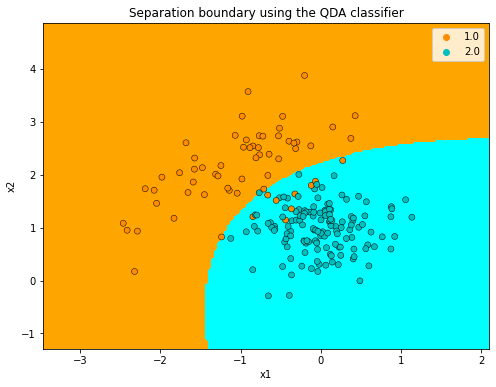

In [160]:
# class prediction for each point on the grid using QDA classifier
Z = qda_classifier(np.c_[xx.ravel(), yy.ravel()])

# plotting the QDA boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=cmap_light)

sns.scatterplot(x=test[:, 1], y=test[:, 2], hue=test[:, 0],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlabel("x1"), plt.ylabel("x2")
plt.title("Separation boundary using the QDA classifier")

**<span style="color:#c83349"> <ins>  Question 4 : Comparison and comments </ins></span>**

***Error rates*** : From the train and test error rates computed previously, LDA and QDA classifiers achieved good results and performed quite similarly on the test set, with a slightly better error rate obtained using the QDA. This is due to the ***limited amount of data*** used for training the models allowing for the approximation of ***normal distribution of features*** inside each class. In this case, the assumption of a common covariance matrix for the classes is reasonable. 

***Decision boundaries*** :
The obtained separation boundary using LDA is a ***hyperplane***, since the expression of the log of probabilities is linear in the input $x$ in this case. 

On the other hand, the QDA classifier builds a more ***flexible separation boundary*** compared to the one obtained using LDA classifier, due to the quadratic term in the expression of the log of probabilities, which makes it more suitable to catch curvatures whenever appropriate. 

***Use of LDA vs QDA :***

***LDA*** classifier is typically used for classification tasks with ***limited amount of data***, as in this example. QDA classfier is recommended when ***the training set is large*** or if the ***assumption of a common covariance matrix for the classes is not realistic***. 

However, one of the limitations of LDA and QDA is the Gaussian distribution assumption of features inside each class. Therefore, a good candidate of these classifiers is *Logistic Regression*, which would potentially outperform them when the Gaussian assumption falls short. 

**<span style="color:#c83349"> <ins>  Question 5 : Comparison with K-nearest neighbours </ins></span>**

In order to have an estimation of the optimal number of neighbors to use for the KNN classifier, we could compute the train and test error rates for different values of $k$.

In [167]:
# using the KNN from sklearn 
from sklearn.neighbors import KNeighborsClassifier

max_k = 30      # max nb of neighbors 
train_errors_knn = np.zeros(shape = (max_k, ))
test_errors_knn = np.zeros(shape = (max_k, ))

for k in range(1, max_k+1):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(train[:, 1:], train[:, 0])

    # predictions on the train and test sets
    c_train_knn = knn_model.predict(train[:, 1:])
    c_test_knn = knn_model.predict(test[:, 1:])
 
    # error rates 
    train_errors_knn[k-1] = np.count_nonzero(c_train_knn[c_train_knn != train[:, 0] ])/train.shape[0]
    test_errors_knn[k-1] = np.count_nonzero(c_test_knn[c_test_knn != test[:, 0] ])/test.shape[0]

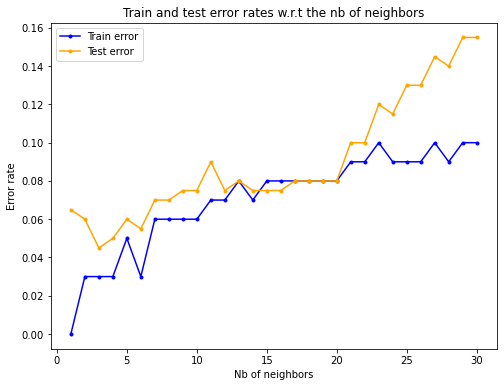

In [209]:
# error rates plotting 
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k+1), train_errors_knn, color = 'blue', marker = '.', label = 'Train error')
plt.plot(range(1, max_k+1), test_errors_knn, color = 'orange', marker = '.', label = 'Test error')

plt.xlabel('Nb of neighbors')
plt.ylabel('Error rate')
plt.title('Train and test error rates w.r.t the nb of neighbors')
plt.legend()

We can notice that the minimum test error rate is obtained for $k \approx 4 $

In [216]:
k =  4    # number of neighbors
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(train[:, 1:], train[:, 0])

c_train_knn = knn_model.predict(train[:, 1:])
c_test_knn = knn_model.predict(test[:, 1:])

In [217]:
# error rates using KNN
train_error_knn = np.count_nonzero(c_train_knn[c_train_knn != train[:, 0] ])/train.shape[0]
test_error_knn = np.count_nonzero(c_test_knn[c_test_knn != test[:, 0] ])/test.shape[0]

print("Emp risk with KNN  : " + str(round(train_error_knn*100, 2)) +"%")
print("Real risk with KNN  : " + str(round(test_error_knn*100, 2)) +"%")

Emp risk with KNN  : 3.0%
Real risk with KNN  : 5.0%


Text(0.5, 1.0, 'The separating boundary using the K-Nearst Neighbors for k = 4')

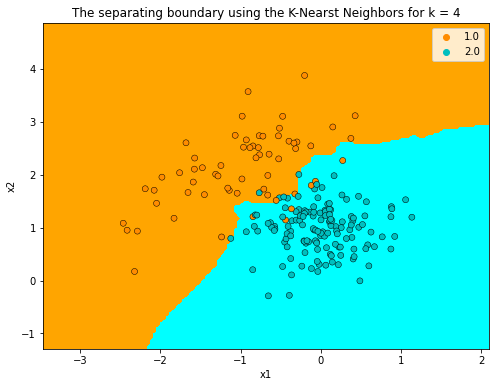

In [218]:
# class prediction for each point on the grid using KNN 
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

# plotting the KNN boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=cmap_light)

sns.scatterplot(x=test[:, 1], y=test[:, 2], hue=test[:, 0],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlabel("x1"), plt.ylabel("x2")
plt.title("The separating boundary using the K-Nearst Neighbors for k = "+ str(k))

***Comment :***
The KNN classifier achieved same results as the QDA on the test set, with a better performance on the train set. Usually, KNN succeeds in catching complex boundaries between the classes. Besides, it is a ***non-parametric model*** and requires only estimating the value of $k$ (nb of neighbors). 

It can also be seen as a «local» discriminant model since the conditional probability for a class $k$ given an input x is the fraction of points in the neighborhood of x belonging to $C_k$.

Though KNN is usually an efficient model, it is also an unstable one (high variance). This suggests that it easily overfits to the training data especially when only limited observations are available. 

## <span style="color:blue"> TO DO : LDA & QDA using scikit-learn module </span>



The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




In [104]:
# using LDA from sklearn 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

skl_LDA = LDA()
skl_LDA.fit(train[:, 1:], train[:, 0])

c_train_skl_lda = skl_LDA.predict(train[:, 1:])
c_test_skl_lda = skl_LDA.predict(test[:, 1:])

# MSE of QDA
mse_train_skl_lda = la.norm(c_train_skl_lda - train[:, 0])**2 / train.shape[0]
mse_test_slk_lda = la.norm(c_test_skl_lda - test[:, 0])**2 / test.shape[0]

print("Emp risk with LDA from sklean : " + str(round(mse_train_skl_lda*100, 2)) +"%")
print("Real risk with QDA from sklean : " + str(round(mse_test_slk_lda*100, 2)) +"%")

Emp risk with LDA from sklean : 3.0%
Real risk with QDA from sklean : 5.5%


In [105]:
# using QDA from sklearn
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

skl_QDA = QDA()
skl_QDA.fit(train[:, 1:], train[:, 0])

c_train_skl_qda = skl_QDA.predict(train[:, 1:])
c_test_skl_qda = skl_QDA.predict(test[:, 1:])

# MSE of QDA == error rate
mse_train_skl_qda = la.norm(c_train_skl_qda - train[:, 0])**2 / train.shape[0]
mse_test_slk_qda = la.norm(c_test_skl_qda - test[:, 0])**2 / test.shape[0]

print("Emp risk with QDA from sklean : " + str(round(mse_train_skl_qda*100, 2)) +"%")
print("Real risk with QDA from sklean : " + str(round(mse_test_slk_qda*100, 2)) +"%")

Emp risk with QDA from sklean : 5.0%
Real risk with QDA from sklean : 5.0%


***Comment :***

Using LDA and QDA from `scikit-learn` library, the performance obtained on both the train and the test set are the similar to the ones obtained early in this exercise. In fact, the underlying setting is the same. 

***Conclusion*** : 

Choosing which model to use raises a trade-off question between *simple and stable* models like LDA (with low variance and high bias) on one hand, and *efficient but unstable* models like KNN (with high variance and low vias) on the other. 

In this regard, ***QDA classifier can be seen as a compromise between LDA and KNN***. Since QDA assumes a quadratic decision boundary, it can accurately model a ***wider range of problems*** than can the linear methods. 
Though not as flexible as KNN, QDA can perform better in the presence of a limited number of training observations because it does make some assumptions about the form of the decision boundary and hence leads to ***interpretable results***.